In [ ]:
#B. Analyzing Data 
#1. Distribution of Player's Age 
#2. Clubs that bought the most numbers of players 
#3. Clubs that sold the most numbers of players
#4. Which 'position' transfer most frequently

#B. Correlationship between the datas
#1. Age vs Transfer Fee
#2. Correlationship between all the variables

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns 
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10,6)

#import data

df= pd.read_csv(r'C:\Users\Cheng Jun\Desktop\R\Portfolio\top250.csv')
df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,Difference
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000,NaN
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000,NaN
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000,NaN
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000,NaN
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000,NaN


In [2]:
#Data Cleaning

Defender=['Centre-Back','Right-Back','Left-Back','Defender','Sweeper']
Forward=['Right Winger','Centre-Forward','Left Winger','Forward','Second Striker']
Midfielder = ['Central Midfield', 'Attacking Midfield', 'Defensive Midfield', 'Left Midfield','Right Midfield', 'Midfielder']
conditions = [
    df['Position'].isin(Defender),
    df['Position'].isin(Forward),
    df['Position'].isin(Midfielder),
    df['Position']=='Goalkeeper']
 
values = ['Defender', 'Forward','Midfielder','Goalkeeper']

df['Position'] = np.select(conditions, values)

df.head()

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,Difference
0,Luís Figo,Forward,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000,NaN
1,Hernán Crespo,Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000,NaN
2,Marc Overmars,Forward,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000,NaN
3,Gabriel Batistuta,Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000,NaN
4,Nicolas Anelka,Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000,NaN


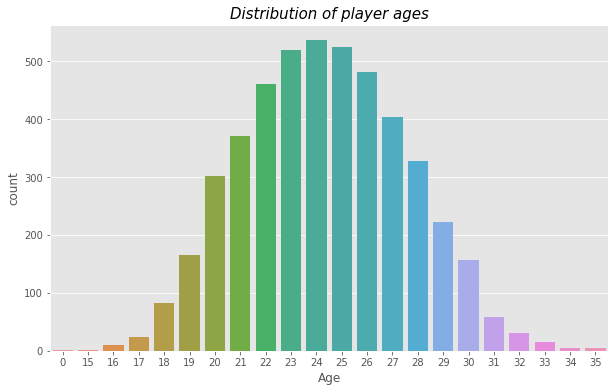

In [8]:
#Data visualization
#Distribution of Player's Age

sns.countplot(x='Age',data=df)
#plt.xticks(rotation=90,fontsize='12')
plt.title('Distribution of player ages',ha='center',fontsize=15,style='oblique')
plt.show()

In [8]:
#clubs that bought the most number of players
ax= px.treemap(df,path=["Team_to"])
ax.show()

#Inter bought the most number of players, followed by Chelsea and Man City

In [5]:
#clubs that sold the most number of players 

ax=px.treemap(df,path=["Team_from"])
ax.show()

#Inter sold the most number of players, followed by Spurs and Juventus

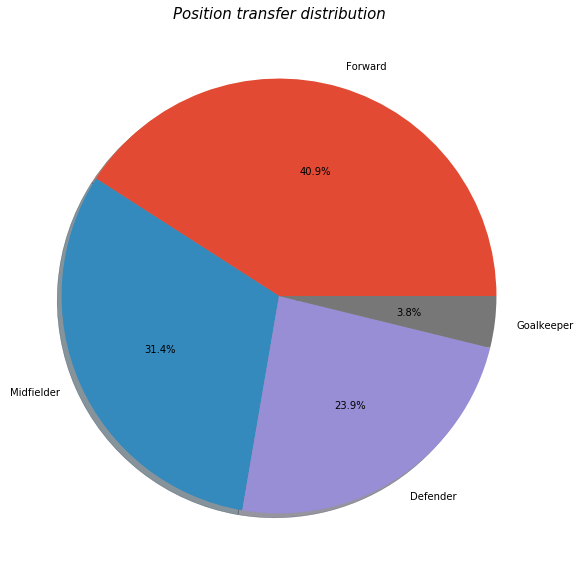

In [10]:
#which player positions transfer most frequently to other clubs

df['Position'].value_counts().plot(kind='pie',figsize=(20,10),autopct = '%1.1f%%',shadow = True)
plt.ylabel('')
plt.title('Position transfer distribution',ha='center',fontsize=15,style='oblique')
plt.show()

#Forwards are the highest in demand as they transfer most frequently between clubs

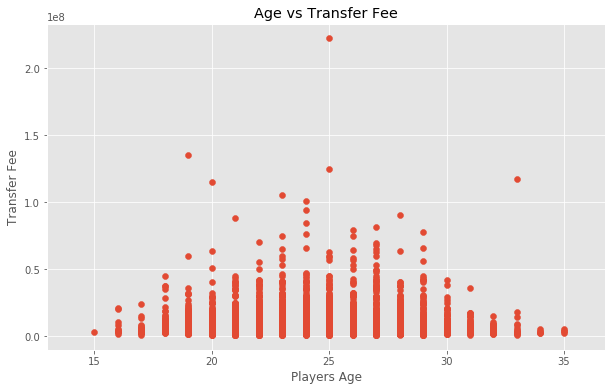

In [21]:
#Let's see if we can find some correlationship between transfer fee and age 

#scatter plot with transfer fee vs age 
plt.scatter(x=df['Age'],y=df['Transfer_fee'])

plt.title('Age vs Transfer Fee')

plt.xlabel('Players Age')

plt.ylabel('Transfer Fee')

plt.xlim(left=13)

plt.show()
 
#Transfer fee are generally higher when the players are aged 21-27. 
#As a player become older, their transfer will gradually increase.
#However as they reach 27 years old, their transfer fee will gradually decrease as they aged older. 
#Players will generated highest transfer fee at aged 27. 

In [13]:
#Look at correlation 

df.corr(method='pearson')

#Observe there is high correlation between Market value and the transfer fee. 

Name             object
Position         object
Age               int64
Team_from        object
League_from      object
Team_to          object
League_to        object
Season           object
Market_value    float64
Transfer_fee      int64
Difference      float64
dtype: object

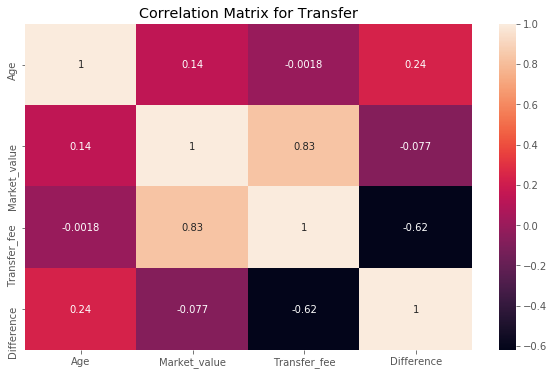

In [12]:
correlation_matrix= df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Transfer')

plt.xlabel('')

plt.ylabel('')

plt.show()

#There is high correlation between transfer fee and market value 
#The transfer fee of the players will be closely correlated to their market values

In [16]:
#data types for columns

df.dtypes

Name              int16
Position           int8
Age               int64
Team_from         int16
League_from        int8
Team_to           int16
League_to          int8
Season             int8
Market_value    float64
Transfer_fee      int64
Difference      float64
dtype: object

In [17]:
#convert to category as we got more variables

df_numerized= df

for col_name in df_numerized.columns: 
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee,Difference
0,1776,1,27,183,68,243,36,0,NaN,60000000,NaN
1,1194,1,25,386,97,176,54,0,NaN,56810000,NaN
2,1823,1,27,43,84,110,36,0,NaN,40000000,NaN
3,1020,1,31,217,97,9,54,0,NaN,36150000,NaN
4,2186,1,21,426,68,221,43,0,NaN,34500000,NaN
...,...,...,...,...,...,...,...,...,...,...,...
4695,1316,3,29,49,97,260,54,18,5000000.0,4800000,200000.0
4696,2803,3,25,381,108,102,47,18,3000000.0,4800000,-1800000.0
4697,2698,0,25,526,97,112,58,18,8500000.0,4500000,4000000.0
4698,3043,1,28,0,45,319,24,18,4500000.0,4500000,0.0


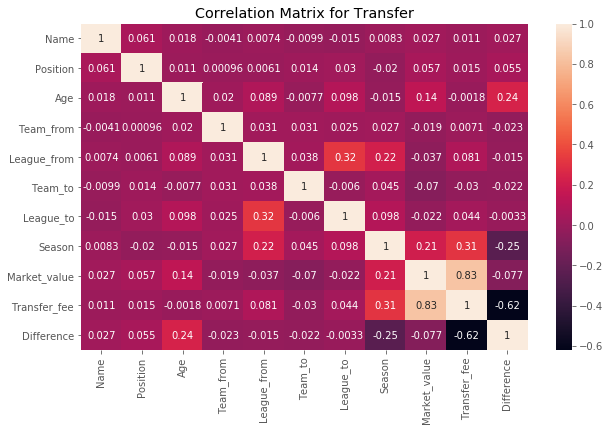

In [18]:
#correlation matrix for all the variables 

correlation_matrix= df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot= True)

plt.title('Correlation Matrix for Transfer')

plt.xlabel('')

plt.ylabel('')

plt.show()

In [ ]:
#Season and transfer fee has a minor correlationship with each other. 
#market_value and transfer_fee has the strongest correlationship. 